# Project I: Effective field theory modeling (Bayesian parameter estimation)
## Learning from data [TIF285], Chalmers, Fall 2023

Last revised: 31-Aug-2023 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions

- See deadline on the course web page
- This project is performed in groups of two students. 
- The extra task of the project is optional. See examination rules on the course web page.
- Hand-in your written report and your solution source code via Canvas.
- Students are allowed to discuss together and help each other when solving the problems and working on projects. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.

### Learning goals:
* Apply and extend the Bayesian parameter estimation ideas and techniques from the course in a realistic scientific setting.
* Learn about some diagnostics for Bayesian parameter estimation.
* Perform MCMC sampling on a small-dimensional problem and interpret the results.
* Explore the impact of: *informative* prior knowledge, dependence on data precision and correlations; modeling discrepancy.
* This a less-guided set of tasks and you will have to put together ideas and tools we've discussed.

### Written report
- Page limit: 6 pages (excluding title page and list of references). 3 extra pages are allowed to present the optional extra task.
- Give a short description of the nature of the problem and the methods you have used.
- Include your results as figures and/or tables. All tables and figures should have relevant captions and labels on the axes.
- Try to give an interpretation of you results.
- Upload the source code of your program as a separate file (.ipynb or .py). Commented code might help the grader.

## Main task
The overall project goal is to reproduce various results in a paper: [*Rigorous constraints on three-nucleon forces in chiral effective field theory from fast and accurate calculations of few-body observables*](https://arxiv.org/abs/2104.04441).  It's a long, scientific paper so don't try to read all of it!  Sec. II of the paper is the most relevant, but you don't need to understand all of it. We'll guide you to the important parts. 

**Note**: Don't expect to exactly reproduce the results in the paper. We will be using a slightly different model, and make some additional approximations, compared to the study by Wesolowski et al. Differences will be larger for the values of inferred parameters than they will be for physical observables.

### General modeling and project description
In this project you are faced with a very general scenario for scientific modeling. You have a physics model with a number of unknown parameters. The model outputs can be compared with observed data. Your task is to infer the model parameters given a set of experimental data while taking your knowledge about sources of uncertainty into account. After checking the consistency of the analysis, the calibrated model can then be used for predictions.

The model is implemented on a computer and is costly to evaluate. In a more general scientific setting, this computer implemented model is known as a **simulator**. The computational complexity can sometimes be reduced by model-order reduction. The general idea is to construct an **emulator** that mimics the output of the simulator. The emulator will usually have smaller precision but can be evaluated at a fraction of the computational cost. Having access to a reduced-order model enables a much richer palette of statistical analyses and computer-aided experiments. 

In this particular project, you are modeling the properties of atomic nuclei starting from chiral effective field theory. Specifically, the model can be used to compute the binding energies ($E$) of $^3$H, $^3$He, $^4$He, the (point-proton) radius ($R_p$) of $^4$He and the comparative beta-decay halflife ($fT$) of $^3$H. You have access to experimental data for these observables, as well as some knowledge of the relevant sources of uncertainty. 

The unknown parameters of the model correspond to certain terms in the effective-field theory description of the strong force. They are labeled $c_D$ and $c_E$. Your task is to perform Bayesian parameter estimation and model checking. Important ingredients of this analysis will be to assess the information content of the different data and the incorporation of both experimental uncertainties and theoretical ones. For the extra task you will explore the main theoretical uncertainty, the so called modeling discrepancy term, in more detail.

### Physics background
(This part with the subsections on chiral EFT, many-body theory and eigenvector continuation, is supplied to provide the physics motivation and background for the study. You don't need to include any of this background context in your project report.)

The modeling of hadronic systems, such as atomic nuclei, involves a theoretical description of the strong interaction. At a very fundamental level, such a description involves quarks and gluons within a type of quantum field theory known as quantum chromodynamics (QCD). This is included in the standard model of particle physics. However, at low energies, quarks condense into hadrons and the fully resolved QCD description becomes intractable. An effective theory can be constructed in which neutrons, protons (and possibly other hadrons) are used as effective degrees of freedom. The most general interaction between these particles, consistent with the symmetries of the underlying theory, can be formulated using the framework of effective field theory (EFT). In this project we are using a physics model based on a so called chiral EFT, which utilizes the spontaneously broken chiral symmetry of QCD. 

Important, general aspects of EFTs are:
- An infinite number of interaction diagrams can be generated. However, they can be ordered by importance using a so called power counting. This gives an EFT expansion for which $Q$, the expansion parameter, is an important property as it sets the convergence rate.
- Many diagrams are associated with unknown parameters, so called low-energy constants (LECs), that must be inferred.
- Predictions can be made at a certain truncation of the EFT expansion. Such model predictions will be associated with a truncation error. This modeling uncertainty can be quantified using our knowledge of the EFT expansion.

#### Chiral EFT for nuclei
Atomic nuclei can be modeled as strongly interacting, quantum many-body systems. Using a non-relativistic approximation, the truncated chiral EFT description gives an interaction potential
$$
V^k(\vec\theta) = V^k_{N\!N}(\vec\theta_{N\!N}) + V^k_{3N}(\vec\theta_{3N}) + \ldots,
$$
where $k$ is the chiral expansion order, $\vec\theta$ is the vector of LECs (model parameters), and the unresolved short-distance physics leads to the appearance of irreducible higher-body forces. In this particular case, we will be considering a scenario where we are operating at $k=3$, known as next-to-next-to-leading order (NNLO), at which three-nucleon forces appear for the first time. We will also make the simplifying assumption that LECs associated with two-nucleon diagrams have already been inferred to infinite precision. This implies that the parameters $\vec\theta_{N\!N}$ are known, but that $\vec\theta_{3N}$ remains to be determined. The parameter vector $\vec\theta_{3N}$ consists of two LECs that are known as $(c_D, c_E)$. The analysis performed in Wesolowski's paper is more involved as it includes a prior uncertainty in $\vec\theta_{N\!N}$. This will not be considered here.

#### Solving the nuclear many-body problem 
We are interested in solving the non-relativistic Schrödinger equation $H \Psi = E \Psi$ for a many-body system. The Hamiltonian will contain the chiral EFT potential plus kinetic energy terms. The eigenvalue $E$ corresponds to the total energy of the system, whereas expectation values of other operators give further observables such as radii and transition strengths.

The solution of the many-body Schrödinger equation can be approached by constructing a single-particle basis and using the formalism of second quantization to obtain a basis for the many-body system under consideration. Projecting the Hamiltonian operator on this (high-dimensional) basis leads to a large-scale eigenvalue problem that can be solved iteratively. For the few-nucleon systems considered here the Hamiltonian matrix can be of size $N \times N$ with $N \approx 10^5$. 

#### Eigenvector continuation emulators
Using an eigensolver developed at Chalmers, the lowest eigenvalues and corresponding eigenstates of $A=3,4$ systems can be found using Lanczos diagonalization in $\approx 60$ seconds. While this is good, it is still not enough for a statistical analysis in which you would like to change parameter values and solve the problem repeatedly. In this project you will be using a reduced-order model that mimics the full solution in just a fraction of the time (milliseconds rather than minutes). It relies on a technique known as eigenvector continuation (EC) that finds an optimal basis and translates the large-scale ($N \approx 10^5$) eigenvalue problem into a small-scale ($N_{EC} \approx 10$) generalized eigenvalue problem. The emulators are described in Sec. III.B of the paper with some relevant references for the interested reader. Again, there is no need to include any of this in your report.

## Tasks

### Task 1: Studies of the posterior with individual data likelihood
- Study the importance of the four observables (E4He, Rp4He, E3H, fT3H) listed in Table I of the paper by computing the four different posteriors
$$
p(c_D, c_E | y_{\mathrm{exp},i}, \sigma_i, I ) \propto p(y_{\mathrm{exp},i} | c_D, c_E, \sigma_i, I) p(c_D, c_E | I ),
$$
  that result from inference given a single datum $y_{\mathrm{exp},i} \in \{\text{E4He, Rp4He, E3H, fT3H}\}$ from the above list and the associated error model represented by $\sigma_i, I$.
- This requires to compute the individual data likelihood for each observable separately as a function of the model parameters $(c_D, c_E) \equiv \vec\theta_{3N}$.
- More specifically, you should try to reproduce figures 6a and 6b from the paper. Remember that you will not get exactly the same results as in the paper due to slight differences in the underlying model and approximations.
- The parameters $c_D, c_E$ can be positive or negative, but are expected to be of natural size. We encode this expectation into the prior
$$
p(c_D, c_E | I) = \mathcal{N}(c_D; \mu=0, \sigma=5) \mathcal{N}(c_E; \mu=0, \sigma=5).
$$
  That is independent, normal distributions with mean zero and standard deviation $\sigma=5$.
- You can assume that each likelihood is given by a normal distribution
$$
p(y_{\mathrm{exp},i} | c_D, c_E, \sigma_i, I) = \mathcal{N} \left( y_{\mathrm{th},i}(c_D, c_E), \sigma_i \right).
$$
  I.e., the mean of the respective distribution is the model prediction $y_{\mathrm{th},i}(c_D, c_E)$ for that observable ($i$) for the given set of model parameters, while the standard deviation $\sigma_i$ reflects the combined experimental and theoretical uncertainties for that observable. This likelihood will be evaluated at the point corresponding to the observed, experimental value $y_{\mathrm{exp},i}$.
- To reproduce Fig. 6a you should use the adopted errors that are presented in Table I. They quantify the combination of experimental error and estimated precision of the many-body solver. That is, you should use $\sigma_i = \sigma_{\mathrm{exp+method},i}$
- To reproduce Fig. 6b you should add a model discrepancy term to your error model such that the total variance becomes $\sigma_i^2 = \sigma_{\mathrm{exp+method},i}^2 + \sigma_{\mathrm{EFT},i}^2$. In this case, the second term (known as a model discrepancy term) quantifies the uncertainty that comes from the truncation of the EFT expansion. Following the paper you can estimate this error with the formula
$$
\sigma_{\mathrm{EFT},i}^2 = \frac{ \left( y_{\mathrm{exp},i} \bar{c} Q^{k+1} \right)^2}{1 - Q^2},
$$
  where $k=3$ and you can fix $\bar{c}=1$ and the expansion parameter $Q=0.33$.

#### Suggestions how to proceed and what to consider
- Use the function `fewnucleonEmulator` in the supplied python module `quantumsolver` (see below) to compute the range of relevant few-nucleon observables for different model input (parameters $c_D, c_E$). Read the docstring of `fewnucleonEmulator` to understand the input arguments and the output. It is suggested to do this on a grid $c_D \in [-2.5, 2.5]$, $c_E \in [-1.0, 1.0]$
- How dense grid can you use given that each model evaluation takes $\lesssim 1$ ms and you would probably not like to wait more than $\sim$ minutes?
- There might be useful utility code in Problem Set 2 for extracting contour levels for a PDF that is evaluated on a grid.
- How many data points would you naively need to infer two model parameters? If you were to combine the data that you have available, which set do you think works best for this inference problem?

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import emcee
import corner
import time
# add additional import statements as needed

Note that `quantumsolver.py` and the data directory `evcData` must be in the same directory as the notebook where the following import statement is evaluated.

In [2]:
import quantumsolver as qs
help(qs.fewnucleonEmulator)

Help on function fewnucleonEmulator in module quantumsolver:

fewnucleonEmulator(cD, cE)
    Computes observables for A=3,4 nuclear systems.
    
    This method uses reduced-order models of the full solutions to the Schrodinger equation.
    These models are based on eigenvector continuation and correspond to the solution
    of generalized eigenvalue problems for small matrices.
    
    Parameters
    ----------
    cD : float
        Low-energy constant for the two-nucleon contact plus one-pion exchange diagram.
    cE : float
        Low-energy constant for the three-nucleon contact diagram.
    
    Returns
    -------
    tuple of 7 floats
        (E4He, Rp4He, Rch4He, E3He, E3H, E1A3H, fT3H)
        in units of
        MeV    fm      fm       MeV    MeV   1    sec
        where the observables are:
        E = ground-state energy
        Rp = point-proton radius
        Rch = Charge radius
        E1A = GT matrix element
        fT = comparative halflife



The relevant function is `fewnucleonEmulator`. You can run

```
help(qs.fewnucleonEmulator)
```

to read the function docstring.

As a test that everything works you can run

```
qs.fewnucleonEmulator(qs.cD_NNLOsat,qs.cE_NNLOsat)
```

which should produce the output: (-28.423318811617758, 1.4824198390733887, 1.6987274146484983, -7.75962047220291, -8.517539812967788, 0.6794354970057697, 1144.0855457148618)

[Credit to Andreas Ekström (Dept. of Physics, Chalmers) for producing the EVC emulator that is used in `fewnucleonEmulator`.]

To avoid for loops when evaluatiung the model on a grid, you might want to create a vectorized version. This can be done with `np.vectorize`. See below including an illustration how it works.

In [3]:
# Vectorized version of the fewnucleonEmulator
vfewnucleonEmulator = np.vectorize(qs.fewnucleonEmulator)

In [4]:
qs.fewnucleonEmulator(qs.cD_NNLOsat,qs.cE_NNLOsat)

(-28.42331881161776,
 1.4824198390733756,
 1.698727414648487,
 -7.759620472202941,
 -8.51753981296779,
 0.6794354970058663,
 1144.085545714597)

In [5]:
def prior(c_D, c_E):
    
    mu = 0 #mean is 0
    std = 5 # standard deviations is 5
    
    prior_pdf= stats.norm.pdf(c_D, loc = mu, scale = std)*stats.norm.pdf(c_E, loc = mu, scale = std) #we assumed independent priors hence we can multiply them together

    return prior_pdf    

In [6]:
def likelihood(y_th_i, y_exp_i, sigma): #should take ce cd?

    
    dist = stats.norm.pdf(y_exp_i, loc = y_th_i, scale = sigma) #each likelihood given by a normal distribution
                                                                #mean is a grid of y_th from the nucleon emulators, evaluate at the experimental values

    return dist

In [7]:
def posterior(likelihood, prior):

    posterior_pdf= likelihood*prior #since we only want to infer values of cE, cD we need not to worry about normalizing

    return posterior_pdf

In [8]:
def contour_levels(grid):    #borrowed from  PS2
    _sorted = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(_sorted) / np.sum(_sorted)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.000001]) ** 2) #0.00....001 is to be rid of a "phantom line" in plot
    return np.sort(_sorted[cutoffs])

In [9]:
def error_with_model_discrepancy(sigma_exp_i, y_exp_i): #here we implement a model discrepancy term to our error

    k = 3 
    Q = 0.33
    c_bar = 1

    sigma_EFT_i_squared=(y_exp_i*c_bar*Q**(k+1))**2/(1-Q**2)

    total_sigma_square = sigma_EFT_i_squared+sigma_exp_i**2
    total_sigma = np.sqrt(total_sigma_square)

    return total_sigma
    

In [10]:
g_points = 1000 
cD_grid = np.linspace(-2.5, 2.5, g_points)
cE_grid = np.linspace(-1.0, 1.0, g_points)

# Create a 2-dimensional grid
cD_eval, cE_eval = np.meshgrid(cD_grid, cE_grid)

# The vectorized version of the few-nucleon emulator will produce an output tuple
# where each element is an array of the same shape as the input
start_time = time.time()

y_th_i = vfewnucleonEmulator(cD_eval, cE_eval) 



adopted_uncertainty={'E4He':0.005, 'Rp4He':0.0062, 'E3H':0.0015, 'fT3H': 3.0} #Values from the scientific article
y_exp={'E4He':-28.296, 'Rp4He':1.4552, 'E3H':-8.482, 'fT3H': 1129.6}
y_th={'E4He':y_th_i[0], 'Rp4He':y_th_i[1], 'E3H':y_th_i[4], 'fT3H': y_th_i[6]}
strings = np.array(['E4He','Rp4He','E3H','fT3H'])

nice_labels = [r'$E\,({}^{4}He)$',r'$r\,({}^{4}He)$', r'$E\,({}^{3}H)$',r'$f\,T_{1/2}$']

prior_pdf = prior(cD_eval, cE_eval) #calculate the prior
end_time = time.time()
runtime = end_time - start_time

print(runtime)

159.22038984298706


C:\Users\ekarl\AppData\Local\Temp\ipykernel_21828\2428408909.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  axs[0].contour(cD_eval, cE_eval, posterior_pdf[:,:,i], levels=HPD_39, colors=my_colors[i], label=nice_labels[i])
C:\Users\ekarl\AppData\Local\Temp\ipykernel_21828\2428408909.py:38: UserWarning: The following kwargs were not used by contour: 'label'
  axs[1].contour(cD_eval, cE_eval, posterior_pdf_2[:,:,i], levels=HPD_39_2, colors=my_colors[i], label=nice_labels[i])


(-0.8, 0.3)

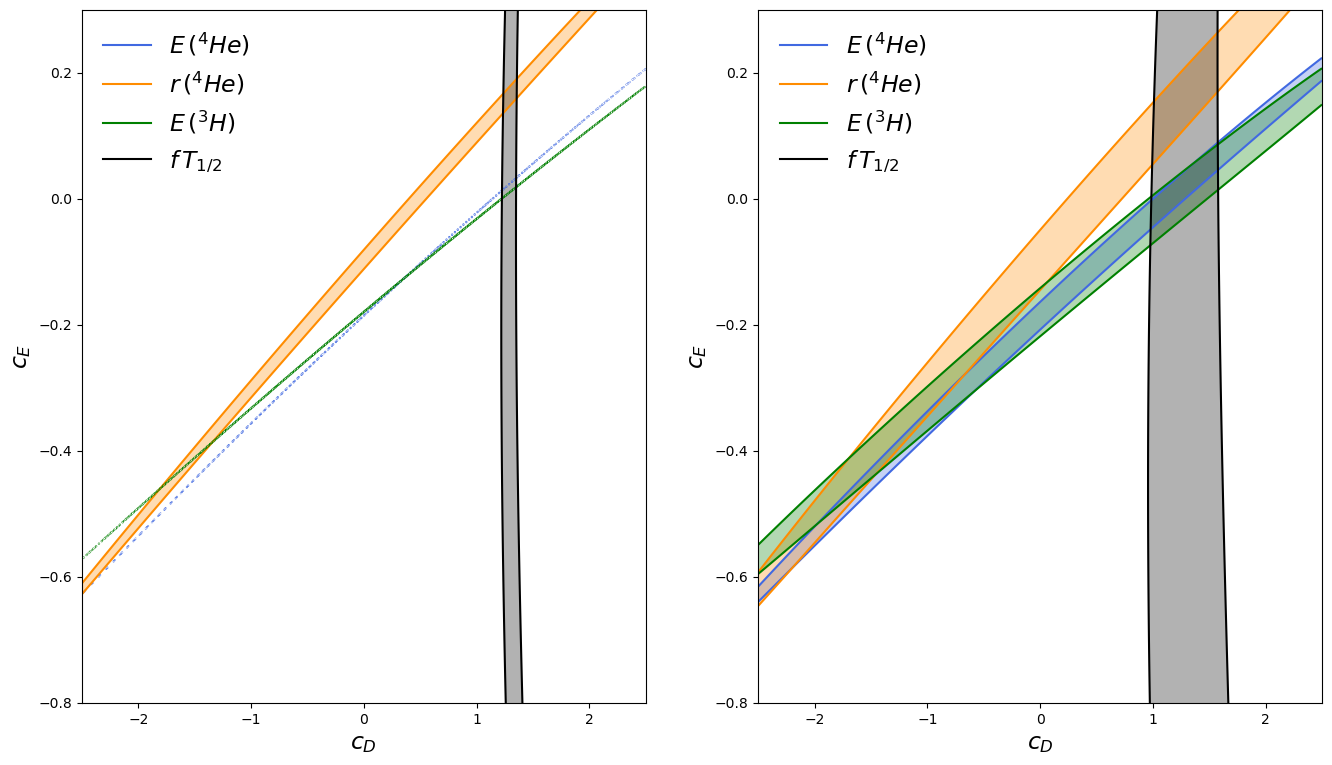

In [11]:
from matplotlib.lines import Line2D

my_colors = np.array(['royalblue','darkorange','g','k'])

likelihood_pdf = np.zeros((g_points,g_points,len(strings))) #create arrays to store likelihood and posterior data if neccesary
posterior_pdf = np.zeros((g_points,g_points,len(strings)))

likelihood_pdf_2 = np.zeros((g_points,g_points,len(strings))) #arrays to store likelihood and posterior data with the extra error term
posterior_pdf_2 = np.zeros((g_points,g_points,len(strings)))
fig, axs = plt.subplots(ncols=2, figsize = (16,9))
my_handles = []


for i in np.arange(len(strings)):
    
    likelihood_pdf[:,:,i] = likelihood(y_th[strings[i]], y_exp[strings[i]], adopted_uncertainty[strings[i]])
    posterior_pdf[:,:,i]=posterior(likelihood_pdf[:,:,i], prior_pdf)
    cont_lvls = contour_levels(posterior_pdf[:,:,i])
    HPD_39 = np.array([cont_lvls[0]])

    axs[0].contour(cD_eval, cE_eval, posterior_pdf[:,:,i], levels=HPD_39, colors=my_colors[i], label=nice_labels[i])
    mask1 = np.ma.masked_where(posterior_pdf[:,:,i] <= cont_lvls[0],posterior_pdf[:,:,i])
    axs[0].contourf(cD_eval, cE_eval, mask1, levels = cont_lvls, colors=my_colors[i],alpha = 0.3)
    
    my_handles.append(Line2D([],[],color=my_colors[i],label=nice_labels[i]))
    axs[0].legend(fontsize=17, handles = my_handles, frameon = False, loc = 'upper left')
    axs[0].set_xlabel(r'$c_D$',fontsize=17)
    axs[0].set_ylabel(r'$c_E$',fontsize=17)
    
    new_error=error_with_model_discrepancy(adopted_uncertainty[strings[i]], y_exp[strings[i]]) #call upon error model discrepancy function
   
    likelihood_pdf_2[:,:,i] = likelihood(y_th[strings[i]], y_exp[strings[i]], new_error)
    posterior_pdf_2[:,:,i]=posterior(likelihood_pdf_2[:,:,i], prior_pdf)
    cont_lvls_2 = contour_levels(posterior_pdf_2[:,:,i])
    HPD_39_2 = np.array([cont_lvls_2[0]])

    
    axs[1].contour(cD_eval, cE_eval, posterior_pdf_2[:,:,i], levels=HPD_39_2, colors=my_colors[i], label=nice_labels[i])
    mask2 = np.ma.masked_where(posterior_pdf_2[:,:,i] <= cont_lvls_2[0],posterior_pdf_2[:,:,i])
    axs[1].contourf(cD_eval, cE_eval, mask2, levels = cont_lvls_2, colors=my_colors[i],alpha = 0.3)
    axs[1].legend(fontsize=17, handles = my_handles, frameon = False, loc = 'upper left')
    axs[1].set_xlabel(r'$c_D$',fontsize=17)
    axs[1].set_ylabel(r'$c_E$',fontsize=17)

axs[0].set_ylim([-0.8, 0.3])
axs[1].set_ylim([-0.8,0.3])
#plt.savefig('Task_1.png')


## Task 2: Sample the posterior
- Perform the inference using MCMC sampling (for example using the `emcee` package) and two different choices for the combined data likelihood that includes two (or four) observables:
  - Case 1: $\{E(^4\mathrm{He}), R_p(^4\mathrm{He})\}$
  - Case 2: $\{E(^4\mathrm{He}), R_p(^4\mathrm{He}), E(^3\mathrm{H}), fT(^3\mathrm{H})\}$
- Include the fixed EFT errors that were computed in the previous task.
- You can assume that all errors are independent, which implies that the total likelihood is just a product of the individual ones.
- Represent the results in a corner plot. I.e., you will basically reproduce the result in Fig. 3 in the paper (which is conditioned on all four observables, i.e., Case 2). Your parameter distribution will be somewhat different partly due to the fixed model discrepancy.

#### Comments and suggestions
* Define functions for the `log_prior`, the `log_likelihood` and the `log_posterior`. The latter is provided as input to the `emcee` sampler. Note that the likelihood (and therefore the posterior) will depend on the choice of data set.
* Operating with log probabilities, the product of independent ones turns into a simple sum.
* `scipy.stats` provides a useful library for working with continuous variable distributions and for evaluating `logpdf`.
* It is probably worthwhile to test your `log_posterior` function before starting the MCMC sampling. 
* Consider beforehand how many samples you can afford to collect.
* The `show_titles=True` option to `corner` will show central results and one-$\sigma$ error limits on the projected posterior plots.
* The `quantiles=[0.16, 0.5, 0.84]`option to corner adds the dashed vertical lines to the marginal posteriors on the diagonal. You can obviously change the quantiles if you want another credibility region.
* The python command `np.percentile(y, [16, 50, 84], axis=0)` might be useful to extract numerical values for the credibility region and the median from a python array `y`.

In [12]:
y_exp_array = np.array([-28.296, 1.4552, -8.482, 1129.6]) #same data from the article, now in array form
sigma_exp_array = np.array([0.005, 0.0062, 0.0015, 3.0]) 

In [13]:
k = 3
Q = 0.33
c_bar = 1

sigma_EFT_squared=(y_exp_array*c_bar*Q**(k+1))**2/(1-Q**2)

total_sigma_squared = sigma_EFT_squared+sigma_exp_array**2
total_sigma_array = np.sqrt(total_sigma_squared)    

In [14]:
def log_prior(theta):
    
    cD = theta[0]
    cE = theta[1]
    mu=0
    log_prior_pdf= stats.norm.logpdf(cD, loc = mu, scale = 5)+stats.norm.pdf(cE, loc = mu, scale = 5)

    return log_prior_pdf

In [15]:
def log_likelihood(theta):

    cD = theta[0]
    cE = theta[1]

    log_dist = 0
    observable_index=[0, 1, 4, 6] #due to the output of the emulator...
    for i in range(0,4): #change here to set number of parameters (2 at first, later 4) i.e. case 1 or case 2
        
        y_th_i = vfewnucleonEmulator(cD, cE)[observable_index[i]] 
        y_exp_i = y_exp_array[i]
        sigma = total_sigma_array[i]
        log_dist += stats.norm.logpdf(y_exp_i, loc = y_th_i, scale = sigma) #for each iteration we add our logpdf which becomes our joint likelihood

    return log_dist

In [16]:
def log_posterior(theta):

    log_posterior_pdf= log_likelihood(theta)+log_prior(theta) #add because we're working with logs

    return log_posterior_pdf

In [17]:
nwalkers = 50 #number of walkers
ndim = 2 # cE and cD

start_positions = np.random.rand(nwalkers, ndim) # these startposition are between 0 and 1 which ought to be fine here
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)

number_of_steps = 3000
state = sampler.run_mcmc(start_positions, number_of_steps)
state =sampler.chain

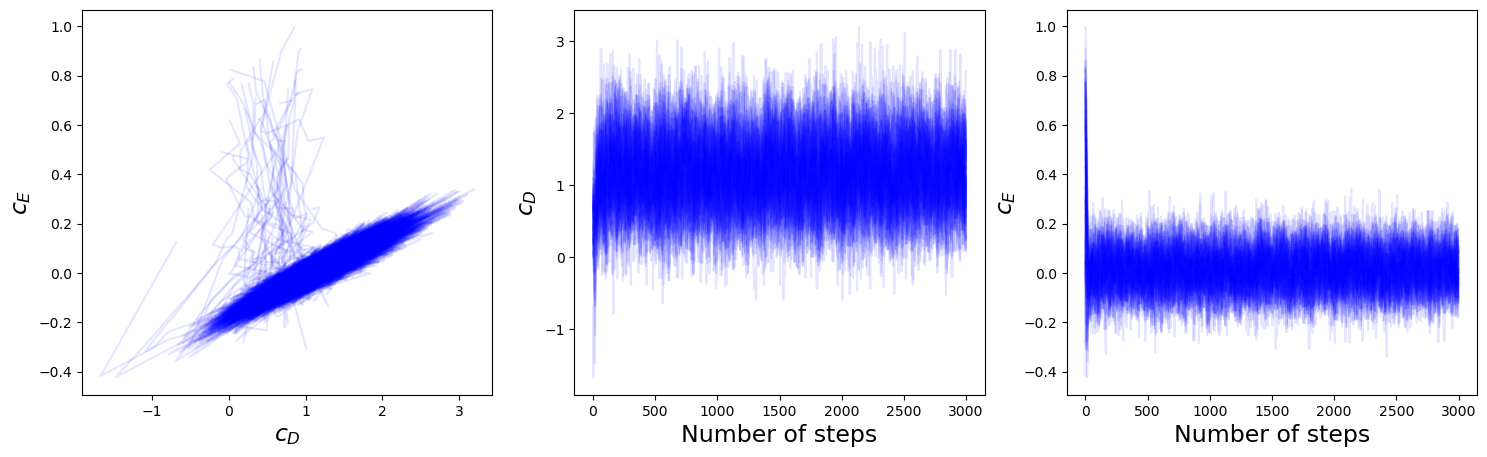

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  


for i in np.arange(nwalkers):
    
    axs[0].plot(state[i, :, 0], state[i, :, 1], color = 'blue', alpha = 0.1)
    axs[0].set_xlabel(r'$c_D$',fontsize=17)
    axs[0].set_ylabel(r'$c_E$',fontsize=17)
    
for i in np.arange(nwalkers):
    
    axs[1].plot(state[i, :, 0], color ='blue', alpha = 0.1)
    
    axs[1].set_xlabel('Number of steps',fontsize=17)
    axs[1].set_ylabel(r'$c_D$', fontsize=17)
for i in np.arange(nwalkers):
    
    axs[2].plot( state[i, :, 1], color ='blue', alpha = 0.1)
    
    axs[2].set_xlabel('Number of steps', fontsize=17)
    axs[2].set_ylabel(r'$c_E$', fontsize=17)
    
#plt.savefig('Task_2_trace_case_1.png')
plt.show()


Here we ananlyzed the trace of walkers in parameter space, and as a function of steps. It is apparent that our walkers find the distribution quite quickly. As such a warmup (burn in) of 100 steps should be sufficient.  

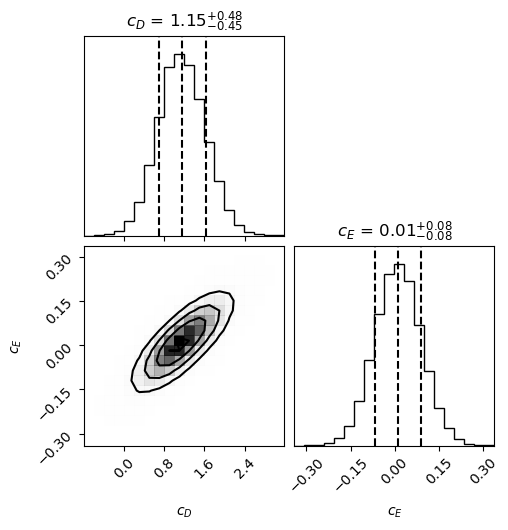

In [19]:

warmup=100
samples = state[:,warmup:,:] #discard first x warmup steps of our data
q = [0.16, 0.5, 0.84] #quantiles
figure = corner.corner(samples, quantiles=q, smooth = True, plot_datapoints = False, labels=[r'$c_D$', r'$c_E$'], show_titles=True)


samples_reshaped = samples.reshape(-1, 2)

cE_16, cE_50, cE_84 = corner.quantile(samples_reshaped[:,1], q)
cD_16, cD_50, cD_84 = corner.quantile(samples_reshaped[:,0], q)

median_cE = cE_50
median_cE = cD_50

plt.savefig('Task_2_posterior_case_2.png')


## Task 3: Posterior predictive distributions
- Use samples from the posterior distribution obtained with the fulll data set (Case 2 of Task 2) and produce a posterior predictive distribution for the four observables. That is, you should reproduce a result similar to the one shown in Fig. 4.
- Represent the results in a corner plot. I.e., you will basically reproduce the result in Fig. 4 in the paper. Your results will be somewhat different partly due to the fixed model discrepancy.
- As the predicted observables are the same ones that were used for calibrating the model (i.e., entering the likelihood), this should be considered as a form of model checking. We are testing that the model is consistent and that the data analysis worked.

In [20]:
sample_grid=samples.reshape(-1,2)
observable_index_to_plot=[4,0,1,6] # we want to plot in the order given in the paper

observables=vfewnucleonEmulator(sample_grid[:,0],sample_grid[:,1]) 

predictive_posterior = np.vstack(observables[observable_index_to_plot[i]] for i in range(0,4))
predictive_posterior = predictive_posterior.T #transpose for formatting reasons

# hmmmm here we get output chains for each of the observabnles
# we arrange these chains into 145000x4 matrix and call corner :)

C:\Users\ekarl\AppData\Local\Temp\ipykernel_21828\1619909770.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  predictive_posterior = np.vstack(observables[observable_index_to_plot[i]] for i in range(0,4))


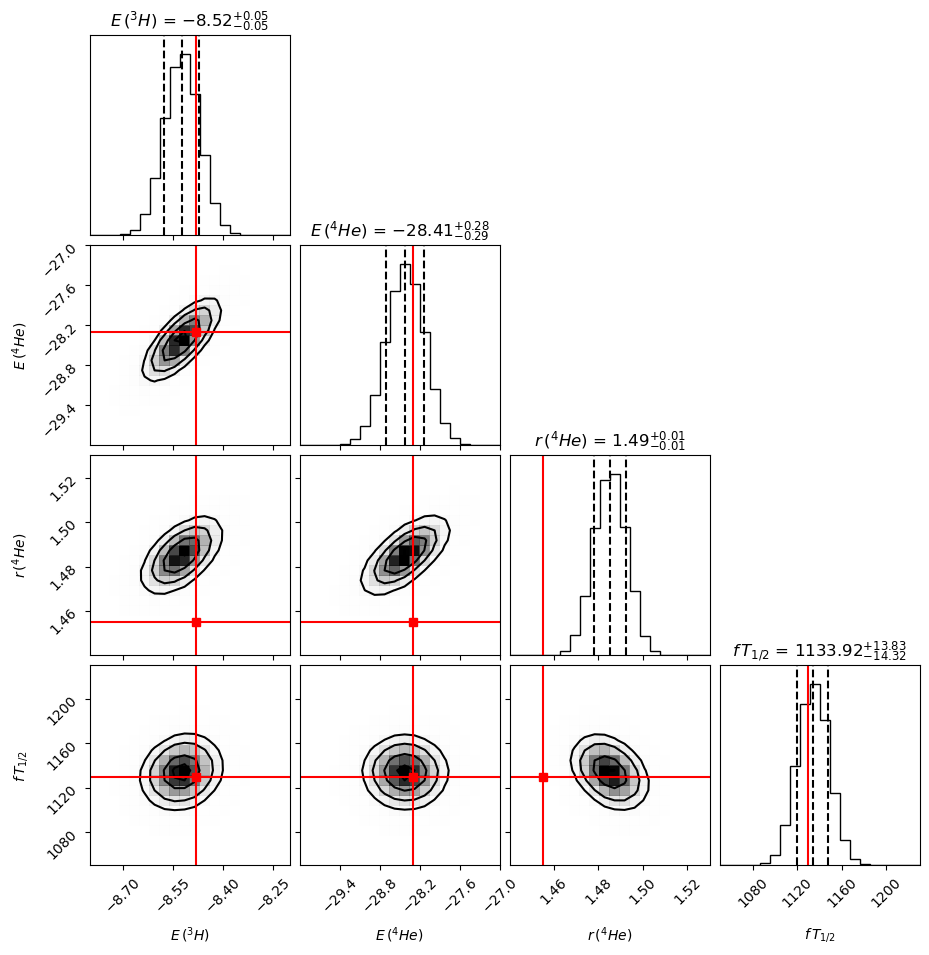

In [21]:
q = [0.16, 0.5, 0.84] #quantiles
figure = corner.corner(predictive_posterior, truths=[-8.482, -28.296, 1.4552, 1129.6], truth_color='red',range=[(-8.8, -8.2), (-30, -27), (1.44, 1.53), (1050, 1230)], quantiles=q, smooth = True, plot_datapoints = False,labels=[r'$E\,({}^{3}H)$',r'$E\,({}^{4}He)$',r'$r\,({}^{4}He)$',r'$f\,T_{1/2}$'], show_titles=True)
ax = figure.get_axes()

plt.savefig('Task_3_posterior_prediction.png')
plt.show()

## Extra task: Sample the error model

Assume that we would like to learn more about our error model, in particular for the model discrepancy term. Can we incorporate an uncertainty about this error in the analysis? Yes, within the bayesian framework this is relatively straightforward. For example, the expansion parameter $Q$ that enters in the variance of the model discrepancy term can be considered a model parameter. In the paper by Wesolowski et al, also the scale $\bar{c}$ was inferred but we will keep it fixed as before.

- The task is now to infer the joint posterior for $c_D, c_E, Q$ given the data and the error model ($\sigma_\mathrm{EFT}$ will not be fixed). 
- Concerning prior information for $Q$ we can use the arguments listed on page 4 in the paper and assign a weakly informative Beta distribution (with parameters $a=3$, $b=5$) for its prior. That is $p(Q|I) = B(Q | a = 3, b = 5)$.
- Try to reproduce Figs. 3 and 4 in the paper. Apart from some differences in the model parameters, the distributions should look more similar than they did in tasks 2 and 3.
- You can also glance at Fig. 5, although you are actually not varying $\bar{c}$.

#### Suggestions how to proceed and what to consider
- You might need more samples or more walkers for this case
- Are there visible differences in the shape of the extracted distributions? Why?
- The keyword argument `range` can be used in the `corner` package to set the fraction of samples that will be shown. It is useful if there are some outliers that would force the plot range to be very large.
- Are we learning anything about $Q$ from this analysis?

In [22]:
def Q_log_likelihood(theta): #should take ce cd?

    cD = theta[0]
    cE = theta[1]
    Q = theta[2]
   
    k =3
    c_bar = 1

    sigma_EFT_squared=(y_exp_array*c_bar*Q**(k+1))**2/(1-Q**2)

    total_sigma_squared =sigma_EFT_squared+sigma_exp_array**2 
    total_sigma_array = np.sqrt(total_sigma_squared)    
    
    log_dist = 0
    observable_index=[0,1,4,6] #due to the output of the emulator...
    for i in range(0,4): #change here to set number of parameters 2 at first, later 4
        
        y_th_i = vfewnucleonEmulator(cD, cE)[observable_index[i]] #error here
        y_exp_i = y_exp_array[i]
        sigma = total_sigma_array[i]
        log_dist += stats.norm.logpdf(y_exp_i, loc = y_th_i, scale = sigma) 

    return log_dist

In [23]:
def Q_log_posterior(theta):

    Q = theta[2]
    
    inf_check = 1.0 > Q > 0.0 #check that Q isnt zero or negative, it would interfer with the log
        
    if inf_check:
        
        log_posterior_pdf =  Q_log_likelihood(theta)+Q_log_prior(theta)
        
        return log_posterior_pdf
        
    return -np.inf #if Q is negative or zero return, -np.inf. If this was encoded in the prior instead issues might arise in that we get
                    # positive inf from the likelihood and negative inf in the prior resulting in an undefined operation -> NaN
                    # furthermore Q cant be bigger than 1, as it could lead to an imaginary errorterm

In [24]:
def Q_log_prior(theta):

    cD = theta[0]
    cE = theta[1]
    Q = theta[2]
    
    mu=0

    log_prior_Q = stats.beta.logpdf(Q, 3, 5)

    
    log_prior_pdf = stats.norm.logpdf(cD, loc = mu, scale = 5)+stats.norm.pdf(cE, loc = mu, scale = 5)+log_prior_Q

    return log_prior_pdf
    

In [25]:
nwalkers = 100
ndim = 3 # cE, cD and Q

start_positions = (np.random.rand(nwalkers, ndim)) # these startposition are between 0 and 1 which ought to be fine here
Q_sampler = emcee.EnsembleSampler(nwalkers, ndim, Q_log_posterior)

number_of_steps=1000
Q_state = Q_sampler.run_mcmc(start_positions, number_of_steps)
Q_state = Q_sampler.chain

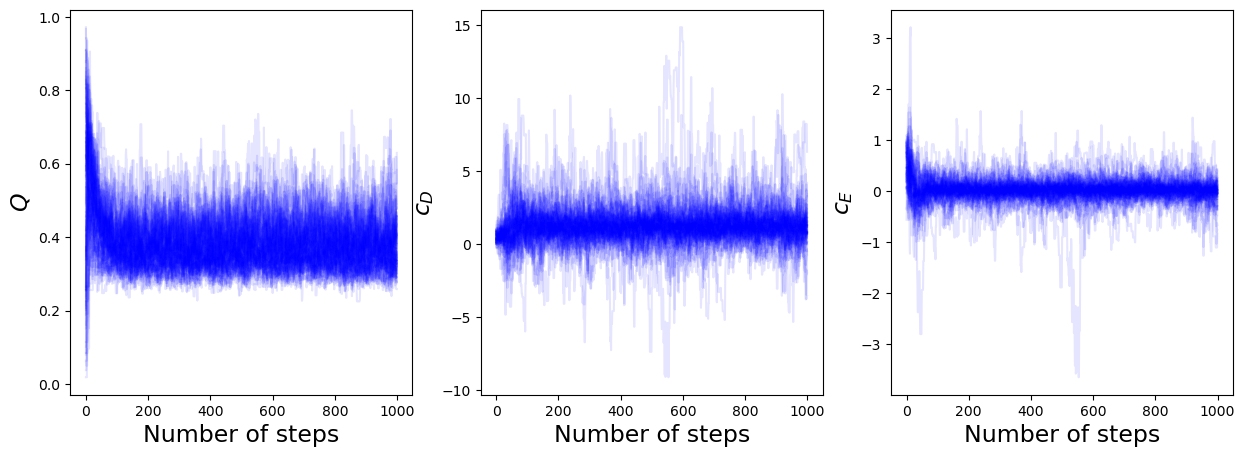

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  


for i in np.arange(nwalkers):
    
    axs[0].plot(Q_state[i, :, 2], color = 'blue', alpha = 0.1)
    

    axs[0].set_xlabel('Number of steps', fontsize=17)
    axs[0].set_ylabel(r'$Q$', fontsize=17)
for i in np.arange(nwalkers):
    
    axs[1].plot(Q_state[i, :, 0], color ='blue', alpha = 0.1)
    
    axs[1].set_xlabel('Number of steps', fontsize=17)
    axs[1].set_ylabel(r'$c_D$',fontsize=17)
for i in np.arange(nwalkers):
    
    axs[2].plot(Q_state[i, :, 1], color ='blue', alpha = 0.1)
    
    axs[2].set_xlabel('Number of steps', fontsize=17)
    axs[2].set_ylabel(r'$c_E$', fontsize=17)

plt.savefig('Task_Xtra_trace.png')
plt.show()

It is apparent that our walkers find the distribution quite quickly, as such a warmup of 100 steps is used.

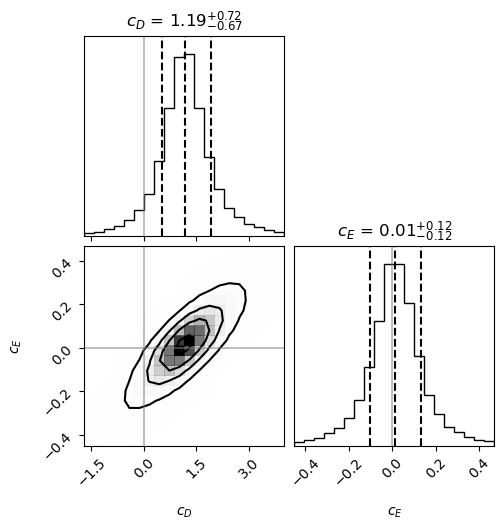

In [27]:
warmup=100


Q_samples = Q_state[:,warmup:,:2] #discard first x warmup steps of our data
q = [0.16, 0.5, 0.84] #quantiles
figure = corner.corner(Q_samples,range=[(-1.7, 4.02), (-0.45, 0.47)], quantiles=q, smooth = True, plot_datapoints = False,labels=[r'$c_D$', r'$c_E$', r'$Q$'], show_titles=True)

vertical_line = 0.0
horizontal_line = 0.0
ax = figure.get_axes()


ax[0].axvline(x=vertical_line, color="gray", linestyle="-", alpha =0.5)


ax[2].axvline(x=vertical_line, color="gray", linestyle="-", alpha =0.5)
ax[2].axhline(y=horizontal_line, color="gray", linestyle="-", alpha =0.5)

ax[3].axvline(x=vertical_line, color="gray", linestyle="-", alpha =0.5)
#plt.savefig('round_Task_Xtra_posterior_with_Q.png')
plt.show()

In [28]:
Q_sample_grid=Q_samples.reshape(-1,2)
observable_index_to_plot=[4,0,1,6] # we want to plot in the order given in the paper

Q_observables=vfewnucleonEmulator(Q_sample_grid[:,0],Q_sample_grid[:,1]) 

Q_predictive_posterior = np.vstack(Q_observables[observable_index_to_plot[i]] for i in range(0,4))
Q_predictive_posterior = Q_predictive_posterior.T #transpose for formatting reasons

C:\Users\ekarl\AppData\Local\Temp\ipykernel_21828\2134934715.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Q_predictive_posterior = np.vstack(Q_observables[observable_index_to_plot[i]] for i in range(0,4))


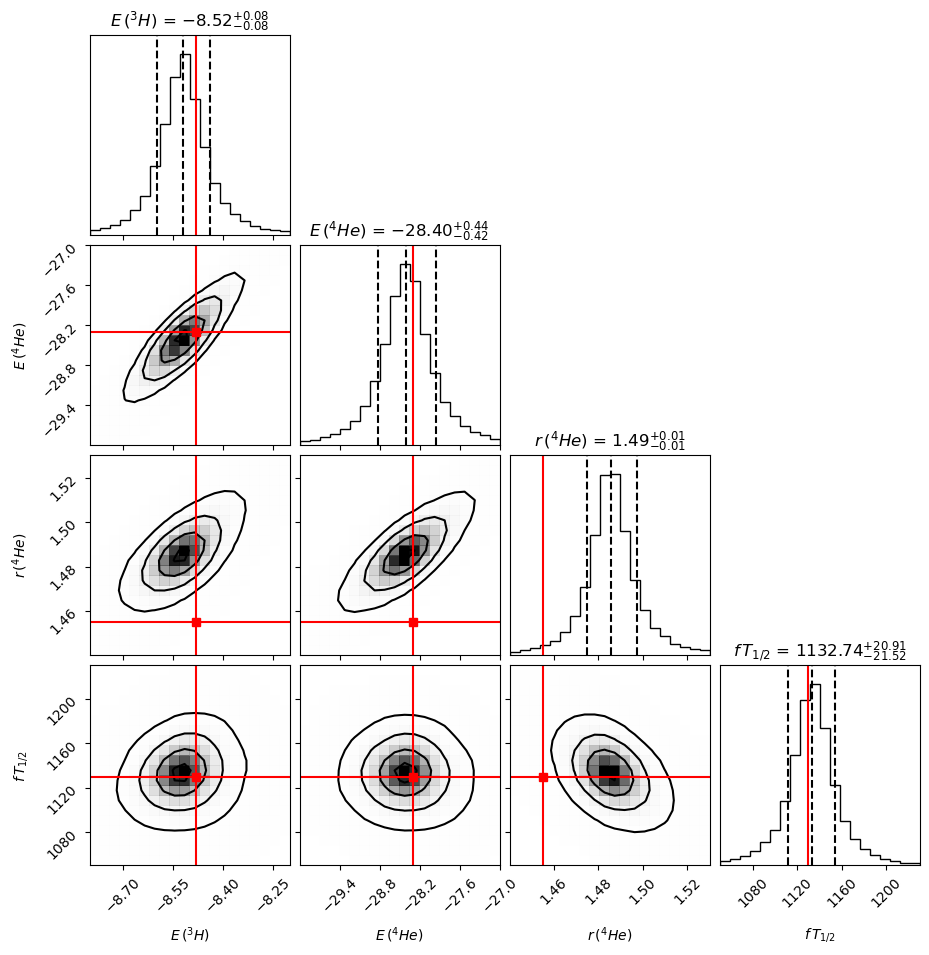

In [29]:
q = [0.16, 0.5, 0.84] #quantiles
figure = corner.corner(Q_predictive_posterior, truths=[-8.482, -28.296, 1.4552, 1129.6], truth_color='red', range=[(-8.8, -8.2), (-30, -27), (1.44, 1.53), (1050, 1230)], quantiles=q, smooth = True, plot_datapoints = False, labels=[r'$E\,({}^{3}H)$',r'$E\,({}^{4}He)$',r'$r\,({}^{4}He)$',r'$f\,T_{1/2}$'], show_titles=True)

plt.savefig('Task_Xtra_posterior_prediction.png')

plt.show()
